# Gradient Descent

## Recap

This notebook illustrates the functional principle of Gradient Descent.  
The objective is to find the global minimum of the linear parabolic function:

$y(x)=2x^2$

To apply Gradient Descent the first derivative $\nabla_x y(x)$ of the objective function after all free parameters is needed:

$\nabla_x y(x) = 4x$

Now the parameter update turns out to be:

$x \to x - \eta * 4x = x(1-4\eta)$

## Example

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
import math

### Define our objective function

In [2]:
def objectiveFunction(x):
    return 2 * x * x

### Define our parameter update function

In [3]:
def gradientDescent(oldParameter, stepSize):
    return oldParameter * (1.0 - 4.0*stepSize)

### Define our possible parameter space

In [4]:
xSpace = np.arange(-2.0,2.01,0.01)

### Initialize the parameter

In [9]:
xInit = 1.8
stepSize = 0.01 # 0.01 # 0.49

### Visualize the iterative process

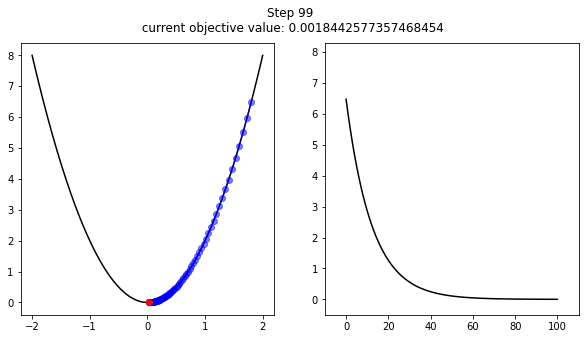

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2) 

xValues = [xInit]
objectiveValues = [objectiveFunction(xInit)]
xCurrent = xInit

durr = np.arange(0.5,0,-0.005)
durr = durr * durr * durr * durr

step = 0
for d in durr:
    
    # perform the parameter update
    xCurrent = gradientDescent(xCurrent, stepSize)
    xValues.append(xCurrent)
    objectiveValues.append(objectiveFunction(xCurrent))

    # just for plotting
    ax.cla()
    ax2.cla()
    ax.set_xlim(-2.2, 2.2)
    ax2.set_xlim(-10,len(durr)+10)
    ax2.set_ylim(-0.5,8.3)
    
    # plot the global objective function, the previous and the current objective values
    ax.plot(xSpace,objectiveFunction(xSpace),'k', label="global objective function")
    ax.plot(xValues,objectiveValues,'bo-',alpha=0.5,label="previous values")
    ax.plot(xCurrent,objectiveFunction(xCurrent),'ro',label="current value")
    
    # plot also the current loss
    ax2.plot(objectiveValues,'k')
    
    fig.suptitle(f'Step {step}\n current objective value: {objectiveFunction(xCurrent)}')
    display(fig);
    
    clear_output(wait = True)
    plt.pause(d)
    step +=1